## IMPORTING LIBRARIES

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
data = pd.read_csv('FIFA_WC_2022_Players_Stats[1].csv')
data

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
0,Argentina,2,Adidas,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65,46.67%,43%,Adidas
1,Argentina,2,Adidas,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,-,-,-,-,-,-,-,-,Nike
2,Argentina,2,Adidas,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,-,-,-,-,-,-,-,-,Adidas
3,Argentina,2,Adidas,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17,-,-,Nike
4,Argentina,2,Adidas,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97,-,-,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Canada,53,Nike,FW,17.0,"Apr 17, 1995",Club Brugge,Cyle Larin,3,0,0,1.33,0.00,0.00,1.95,-,-,Nike
810,Canada,53,Nike,FW,19.0,"Nov 2, 2000",Bayern Munich,Alphonso Davies,3,1,0,6.00,1.00,0.67,6.67,-,-,Nike
811,Canada,53,Nike,FW,20.0,"Jan 14, 2000",Lille,Jonathan David,3,0,0,1.41,0.00,0.47,1.88,-,-,Adidas
812,Canada,53,Nike,FW,23.0,"Sep 27, 1999",Basel,Liam Millar,1,0,0,0.00,0.00,0.00,0.00,-,-,Adidas


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  814 non-null    object 
 1   FIFA Ranking                 814 non-null    int64  
 2   National Team Kit Sponsor    813 non-null    object 
 3   Position                     814 non-null    object 
 4   National Team Jersey Number  813 non-null    float64
 5   Player DOB                   814 non-null    object 
 6   Club                         814 non-null    object 
 7   Player Name                  814 non-null    object 
 8    Appearances                 814 non-null    object 
 9   Goals Scored                 813 non-null    object 
 10  Assists Provided             813 non-null    object 
 11  Dribbles per 90              813 non-null    object 
 12  Interceptions per 90         813 non-null    object 
 13  Tackles per 90      

In [234]:
data.columns

Index(['Nationality ', 'FIFA Ranking ', 'National Team Kit Sponsor',
       'Position', 'National Team Jersey Number', 'Player DOB', 'Club ',
       'Player Name ', ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90', 'Interceptions per 90', 'Tackles per 90',
       'Total Duels Won per 90', 'Save Percentage', 'Clean Sheets',
       'Brand Sponsor/Brand Used'],
      dtype='object')

We'll clean the column names as they are not properly defined and have unnecessary indentation. Some of the names are also too long to read and use so we'll try to shorten them

In [235]:
data = data.rename(columns = {'Nationality ':'Nationality','FIFA Ranking ':'FIFA Ranking','National Team Kit Sponsor':'Kit sponsor',
                         'National Team Jersey Number':'Jersey number','Club ':'Club', 'Player Name ':'Player name', 
                          ' Appearances':'Appearances','Goals Scored ':'Goals scored', 'Assists Provided ':'Assists',
                        'Dribbles per 90':'Dribbles','Interceptions per 90':'Interceptions','Tackles per 90':'Tackles',
                              'Total Duels Won per 90':'Duels won','Brand Sponsor/Brand Used':'Brand sponsor' })

Some of the columns in data are also mistakenly defined as 'object' when they should have been assigned a numeric data type. We'll convert there data types to either int or float

## DATA INSPECTION

### NATIONALITY

In [236]:
print('TOTAL NUMBER OF TEAMS :',data['Nationality'].nunique())
print('\n')

print('SQUAD STRENGTH OF EACH TEAM :')
data['Nationality'].value_counts().to_frame()

TOTAL NUMBER OF TEAMS : 32


SQUAD STRENGTH OF EACH TEAM :


,Nationality
Argentina,26
South Korea,26
Uruguay,26
Ghana,26
Germany,26
Tunisia,26
Denmark,26
Mexico,26
Qatar,26
Spain,26


**32 nations** participated in the tournament with most of teams having full permissable squad capacity of **26**. Some of the teams that had only 24 players in the squad were **Serbia, Senegal, Cameroon, Japan and Saudi Arabia** 

### FIFA RANKING

Let's see who were the top 10 teams going in to the World cup according to their FIFA rankings

In [237]:
top10_teams = data[data['FIFA Ranking'] <= 10][['Nationality','FIFA Ranking']].sort_values(by = 'FIFA Ranking').groupby(['FIFA Ranking','Nationality']).size().to_frame().drop(0, axis = 1)
print('TOP 10 TEAMS IN WC BASED ON THEIR FIFA RANKINGS :') 
top10_teams

TOP 10 TEAMS IN WC BASED ON THEIR FIFA RANKINGS :


,
FIFA Ranking,Nationality
1,Brazil
2,Argentina
3,France
4,Belgium
5,England
6,Netherlands
7,Croatia
9,Portugal
10,Spain


**Brazil** was the top ranked team going in to the World Cup. And it looks like the team at **8th (Italy)** spot did not qualify for the World cup. 

### KIT SPONSOR

In [238]:
team_sponsor = data[['Kit sponsor','Nationality']].groupby(['Nationality','Kit sponsor']).size().to_frame().drop(0, axis = 1)

print('NATIONAL TEAMS AND THEIR SPONSORS :')
team_sponsor

NATIONAL TEAMS AND THEIR SPONSORS :


,
Nationality,Kit sponsor
Argentina,Adidas
Australia,Nike
Belgium,Adidas
Brazil,Nike
Cameroon,One All Sports
Canada,Nike
Costa Rica,New Balance
Croatia,Nike
Denmark,Hummel


From the above analysis it looks like most of the teams were sponsored by **Nike**

### POSITION

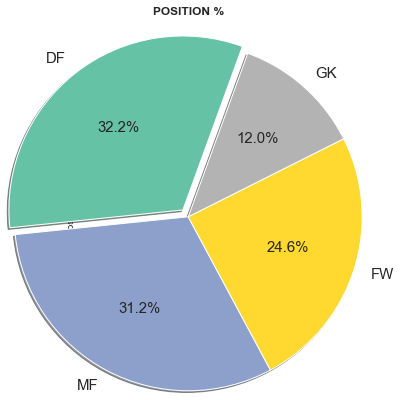



NATIONAL TEAMS AND THEIR POSITION COUNT :


Position,DF,FW,GK,MF
Nationality,,,,
Argentina,9,7,3,7
Australia,9,8,3,6
Belgium,7,7,3,8
Brazil,8,9,3,6
Cameroon,6,9,3,6
Canada,7,8,3,8
Costa Rica,7,3,3,12
Croatia,9,6,3,8
Denmark,10,9,3,4


In [239]:
data['Position'].value_counts().plot.pie(radius = 2, autopct = '%1.1f%%', startangle = 70, textprops = {'size':15}, 
             explode = [0.1,0,0,0], shadow = True, cmap = 'Set2')

plt.title('POSITION %', y = 1.4, weight = 'bold')
plt.show()

print('\n')
print('NATIONAL TEAMS AND THEIR POSITION COUNT :')
pd.crosstab(data['Nationality'], data['Position'])

World cup teams had a large pool of both **Defenders (DF)** and **Midfielders (MF)** to choose from. Over **260** defenders and **250** midfielders participated in the tournament

### CLUB

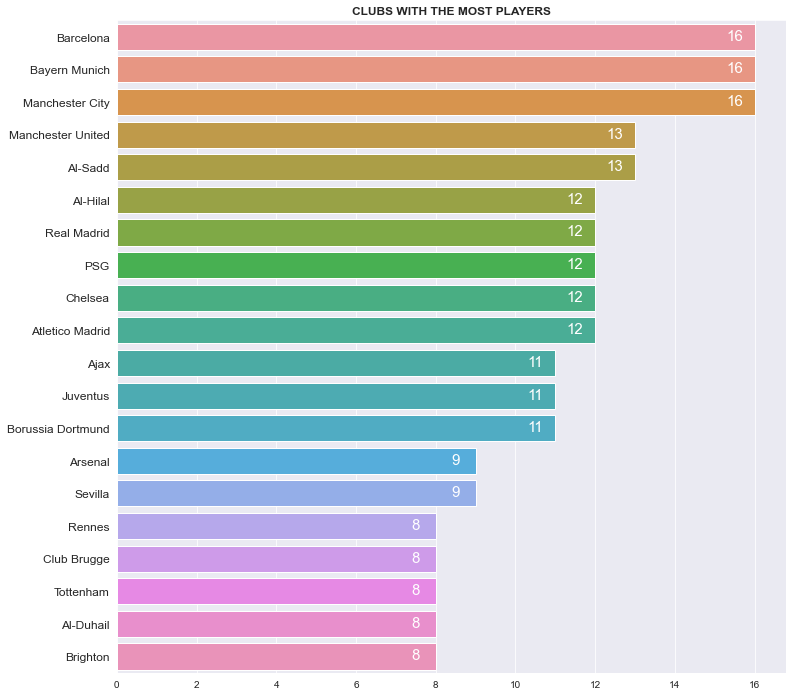

In [240]:
plt.figure(figsize = (12,12))
xy = sns.barplot(y = data['Club'].value_counts().head(20).index, x = data['Club'].value_counts().head(20).values)
for i in range(20):
    value = data['Club'].value_counts().head(20)[i]
    xy.text(x = value - 0.5  ,y = i + 0.1 , s = value, color='white', ha="center", fontsize = 15)
    
plt.title('CLUBS WITH THE MOST PLAYERS', weight = 'bold')
plt.yticks(fontsize = 12)
plt.show()

**Barcelona, Bayern Munich and Manchester City** dominated the charts of clubs with the most players in this World cup 

### BRAND SPONSOR

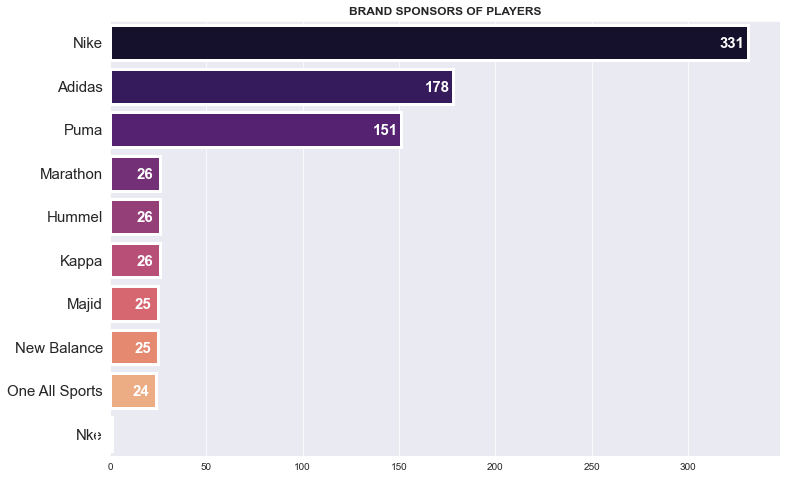

In [241]:
plt.figure(figsize = (12,8))
xy = sns.barplot(y = data['Kit sponsor'].value_counts().index, x = data['Kit sponsor'].value_counts().values, 
            edgecolor = 'white', lw = 3, palette = 'magma')

for i in range(10):
    value = data['Kit sponsor'].value_counts()[i]
    xy.text(x = value - 8,y = i +0.125 , s = value, color='white', ha="center",fontsize = 15, weight = 'bold')
    

plt.title('BRAND SPONSORS OF PLAYERS', weight = 'bold')
plt.yticks(fontsize = 15)

plt.show()

**Nike** was the most perfered brand sponsor of players with over 300 players being affiliated to it. The next in line were **Adidas** and **Puma**

### APPEARANCES

In [242]:
data['Appearances'].value_counts()

3      193
N.A    145
1      117
2      113
4      112
0       41
5       35
7       27
6       23
-        7
N,A      1
Name: Appearances, dtype: int64

This feature has some redundant values like N,A and N.A. This means that these players did not get to play even 1 game and hence we'll replace these values with 0. Also the column data type here is set as object and we'll also convert it into integer data type

In [243]:
# Assigning 0 to values
data.loc[data['Appearances'] == 'N.A', 'Appearances'] = 0
data.loc[data['Appearances'] == '-', 'Appearances'] = 0

# Dropping N,A Value 
data.drop(data.loc[data['Appearances'] == 'N,A'].index, axis = 0, inplace = True)

# Converting the object data type to integer
data['Appearances'] = data['Appearances'].astype(int)

print('MAXIMUM APPEARANCE BY ANY PLAYER :',data['Appearances'].max())

print('PLAYERS WITH THE MOST APPEARANCES :')
data.loc[data['Appearances'] == 7]['Player name'].to_frame()

MAXIMUM APPEARANCE BY ANY PLAYER : 7
PLAYERS WITH THE MOST APPEARANCES :


,Player name
0,Emiliano Martinez
3,Nicolas Otamendi
7,Nahuel Molina
10,Cristian Romero
13,Rodrigo De Paul
17,Enzo Fernandez
19,Lionel Messi 🐐
23,Julian Alvarez
39,Aurelien Tchouaméni
45,Kylian Mbappe


In [244]:
data['Appearances'].value_counts().to_frame().style.background_gradient(cmap = 'Greys')

,Appearances
0,193
3,193
1,117
2,113
4,112
5,35
7,27
6,23


There were over **190 players** who didn't get to play even a single game. And there were only **27 players** who played every game! That's only **3%** of the total pool of players

### GOALS SCORED

In [245]:
data['Goals scored'].value_counts()

0      469
N.A    147
1       86
-       81
2       18
3        7
4        2
7        1
8        1
Name: Goals scored, dtype: int64

This feature also has redundant values like - and N.A. Hence we'll replace these values with 0. Also the column data type here is set as object and we'll also convert it into integer data type

In [246]:
# Replacing redundant values with 0
data.loc[data['Goals scored'] == 'N.A', 'Goals scored'] = 0
data.loc[data['Goals scored'] == '-', 'Goals scored'] = 0


# Converting the data type to float
data['Goals scored'] = data['Goals scored'].astype(float)


C:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


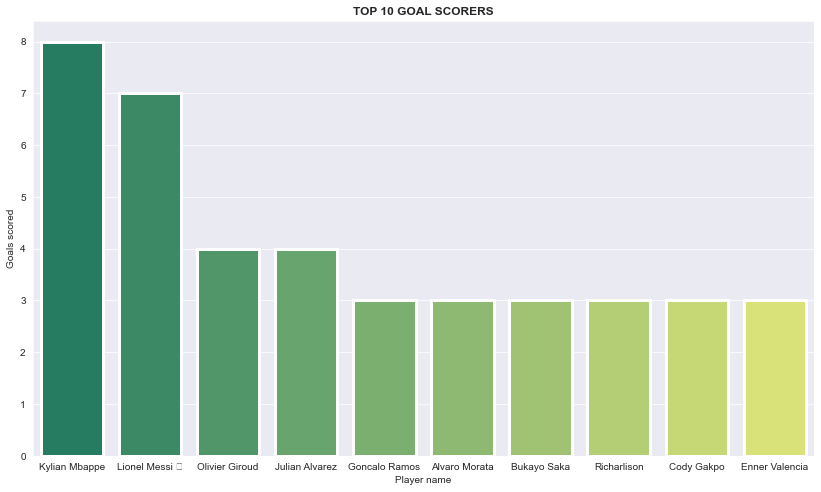

In [247]:
#TOP10 goals scorer

top10_goals = data.sort_values(by = 'Goals scored', ascending = False)[['Player name','Goals scored']].head(10)

plt.figure(figsize = (14,8))
sns.barplot(x = top10_goals['Player name'], y = top10_goals['Goals scored'], edgecolor = 'white', lw = 3, palette = 'summer' )

plt.title('TOP 10 GOAL SCORERS', weight = 'bold')
plt.xticks(fontsize = 10)
plt.show()



**Kylian Mbappe** scored the most goals (8) in the tournament by beating **Lionel Messi** (7 goals) with just a waffer thin margin

### ASSISTS

In [248]:
data.loc[data['Assists'] == 'N.A', 'Assists'] = 0
data.loc[data['Assists'] == '-', 'Assists'] = 0

data['Assists'] = data['Assists'].astype(float)



In [249]:
print('PLAYERS WITH THE MOST ASSISTS :')
data.loc[data['Assists'] == data['Assists'].max()][['Player name','Assists']]

PLAYERS WITH THE MOST ASSISTS :


,Player name,Assists
19,Lionel Messi 🐐,3.0
47,Antoine Griezmann,3.0
71,Ivan Perisic,3.0
148,Harry Kane,3.0
194,Bruno Fernandes,3.0


5 players were tied together as top assist provider with each of them providing **3 assists**

### DUELS WON

In [250]:
# Using Unique() we first find the redundant values
data['Duels won'].unique()

# Cleaning up the redundant values
data.loc[data['Duels won'] == 'N.A', 'Duels won'] = 0
data.loc[data['Duels won'] == '-', 'Duels won'] = 0
data.loc[data['Duels won'] == 'nan', 'Duels won'] = 0


data['Duels won'] = data['Duels won'].astype(float)

In [251]:
print('PLAYER THAT WON THE MOST DUELS :')
data.loc[data['Duels won'] == data['Duels won'].max()][['Nationality','Position','Player name','Duels won']]

PLAYER THAT WON THE MOST DUELS :


,Nationality,Position,Player name,Duels won
50,France,FW,Marcus Thuram,18.49


**Marcus Thuram** won the most duels with 18.49. Well this is a big surprise when you consider that he is an attacking forward and a player who did not even get to play all the games!

### SAVE PERCENTAGE

In [252]:
# Cleaning redundant values
data.loc[data['Save Percentage'] == 'N.A', 'Save Percentage'] = 0
data.loc[data['Save Percentage'] == '-', 'Save Percentage'] = 0

# Replacing % sign with blank space
data['Save Percentage'] = data['Save Percentage'].str.replace('%','')


data['Save Percentage'] = data['Save Percentage'].astype(float)

In [253]:
saves_made = data[data['Appearances'] >= 4][['Nationality','Position','Player name','Save Percentage']]

# Dropping null values
saves_made.dropna(inplace = True)

# Sorting the order
saves_made.sort_values(by = 'Save Percentage', inplace = True)
saves_made

,Nationality,Position,Player name,Save Percentage
0,Argentina,GK,Emiliano Martinez,46.67
283,Senegal,GK,Edouard Mendy,50.00
232,USA,GK,Matt Turner,53.33
331,South Korea,GK,Kim Seung-gyu,57.89
77,Morocco,GK,Yassine Bounou,58.33
129,England,GK,Jordan Pickford,63.64
180,Portugal,GK,Diogo Costa,64.17
206,Australia,GK,Mat Ryan,66.67
359,Spain,GK,Unai Simon,66.67
26,France,GK,Hugo Lloris,70.83


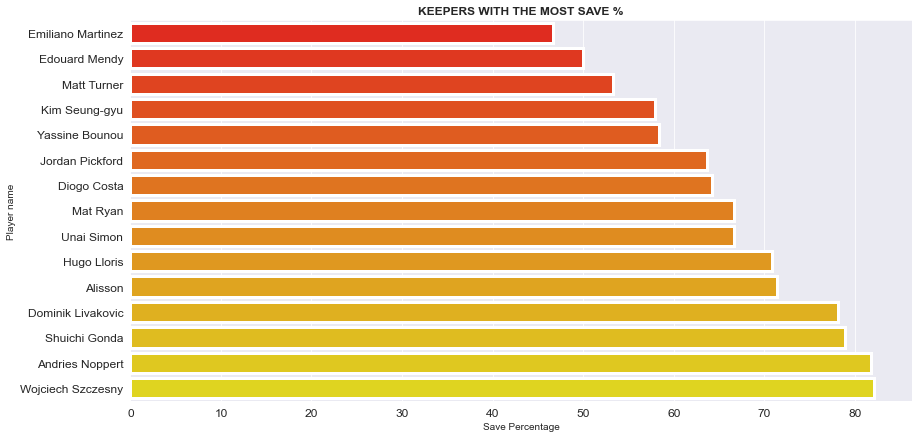

In [254]:
plt.figure(figsize = (14,7))
sns.barplot(y = saves_made['Player name'], x = saves_made['Save Percentage'], edgecolor = 'white', lw = 3, palette = 'autumn')


plt.title('KEEPERS WITH THE MOST SAVE %', weight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()



**W. Szczesny** of Poland has the best save percentage of the tournament with over **80%**. Szczesny also made history by becoming the only player who saved back to back 3 penalties in the tournament!

A big thumbs up to **A. Noppert** of The Netherlands as well who came 2nd and lost to Szczesny by a margin of less than even 1%

## CONCLUSION

FIFA WC 22 hosted **32 nations** with over **800 players** participating in the month long tournament. Out of these players only **27** players got the chance to play all the matches. And over **190** didn't even get to play a single match

American giant **Nike** was the most branded company in the tournament with most teams and players being sponsored by it. The next in contention were **Adidas** and **Puma**

Players from **FC Barcelona, Manchester City and Bayern Munich** had the most presence in the tournament with all the 3 clubs having **16** players each representing their nations

**Kylian Mbappe** scored the most goals (8) in the tournament with **Lionel Messi** and **Olivier Giroud** attaining the 2nd and 3rd place respectively

**Lionel Messi** however had the joint most assists in the tournament. 4 other players shared the same podium with each of them having **3** assists.

**W. Szczesny** had the top most save percentage in the tournament with over **80%**